In [1]:
# https://github.com/tallesfelix/directions-with-osm-networkx/blob/master/Creating%20routes%20with%20networkx%20and%20ipyleaflet.ipynb
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString, mapping
import geopandas as gpd
from ipyleaflet import *

/home/blaxeep/.local/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [10]:
place_name = "Greece"
ox.config(use_cache=True, log_console=True)
#cf = '["highway"~"motorway|motorway_link|trunk|secondary|primary"]'
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link"]'
#cf = '["highway"~"motorway|motorway_link"]'
greece_graph = ox.graph_from_place(place_name, network_type='drive', custom_filter=cf)
#fig, ax = ox.plot_graph(graph)
greece_nodes, greece_edges = ox.graph_to_gdfs(greece_graph)

In [17]:
zogr = "Municipality of Thessaloniki"
ox.config(use_cache=True, log_console=True)
#cf = '["highway"~"motorway|motorway_link|trunk|secondary|primary"]'
#cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary_link|primary"]'
zogr_graph = ox.graph_from_place(zogr, network_type='drive')
zogr_nodes, zogr_edges = ox.graph_to_gdfs(zogr_graph)

In [5]:
G3 = nx.compose(greece_graph, zogr_graph)

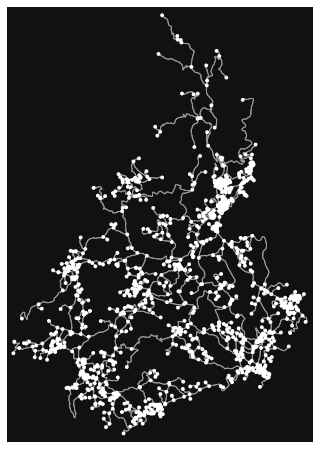

In [13]:
fig, ax = ox.plot_graph(zogr_graph)

In [74]:
dest_graph_fpath = '/home/blaxeep/workspace/osm_project/results/graphs/'
poleis = ['Komotini Municipality', 'Municipality of Athens', 'Municipality of Mytilene', 'Municipality of Patras', 'Municipality of Kozani','Ioannina Municipality','Municipality of Larissa','Corfu', 'Municipality of Thessaloniki', 'Municipality of Heraklion', 'Syros', 'Municipality of Tripoli', 'Lamia']
for poli in poleis:
    zogr_graph = ox.graph_from_place(str(poli), network_type='drive')
    zogr_nodes, zogr_edges = ox.graph_to_gdfs(zogr_graph)
    destination = dest_graph_fpath + str(poli) +str('.graphml')
    ox.save_graphml(zogr_graph, destination)

80022 184574


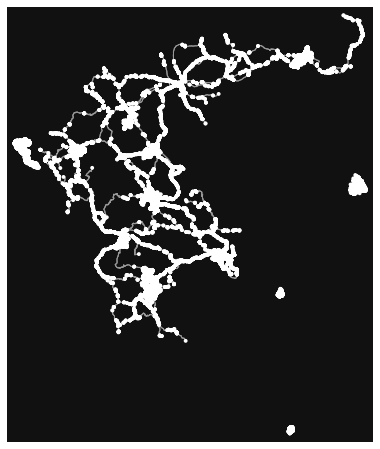

In [11]:
dest_graph_fpath = '/home/blaxeep/workspace/osm_project/results/graphs/'
G_all = greece_graph
poleis = ['Komotini Municipality', 'Municipality of Athens', 'Municipality of Mytilene', 'Municipality of Patras', 'Municipality of Kozani','Ioannina Municipality','Municipality of Larissa','Corfu', 'Municipality of Thessaloniki', 'Municipality of Heraklion', 'Syros', 'Municipality of Tripoli', 'Lamia']
for poli in poleis:
    local_path = dest_graph_fpath + str(poli) +str('.graphml')
    local_graph = ox.load_graphml(local_path)
    #G_all = nx.union(G_all, local_graph, rename=('G_all-','loc_graph-'))
    G_all = nx.compose(G_all, local_graph)
supergraph_dest = '../results/prim_sec_graph.graphml'
ox.save_graphml(G_all, supergraph_dest)
zogr_nodes, zogr_edges = ox.graph_to_gdfs(G_all)
print(len(zogr_nodes), len(zogr_edges))
fig, ax = ox.plot_graph(G_all)

In [6]:
#local_path = dest_graph_fpath + 'Corfu' +str('.graphml')
#local_graph = ox.load_graphml(local_path)
#nodes, edges = ox.graph_to_gdfs(local_graph)
G3 = G_all
nodes, edges = ox.graph_to_gdfs(G_all)

In [9]:
nodes, edges = ox.graph_to_gdfs(G3)
center = (37.714155,24.056792)
m = Map(center=center, basemap=basemaps.CartoDB.Positron, zoom=8)

to_marker_style = AwesomeIcon(
    name='circle',
    icon_color='white',
    marker_color='red',
    spin=False
)
from_marker = Marker(location=center)
print(from_marker)
to_marker = Marker(location=center, icon=to_marker_style)

def set_nearest_node(marker):
    marker.nearest_node = ox.get_nearest_node(G3, marker.location)
    return

path_layer_list = []

def handle_change_location(event, marker):
    event_owner = event['owner']
    event_owner.nearest_node = ox.get_nearest_node(G3, event_owner.location)
    marker.neares_node = ox.get_nearest_node(G3, marker.location)
    
    shortest_path = nx.dijkstra_path(G3, event_owner.nearest_node, marker.neares_node, 
                                     weight='length')
    
    if len(path_layer_list) == 1:
        m.remove_layer(path_layer_list[0])
        path_layer_list.pop()
    
    shortest_path_points = nodes.loc[shortest_path]
    path = gpd.GeoDataFrame([LineString(shortest_path_points.geometry.values)], columns=['geometry'])
    path_layer = GeoData(geo_dataframe=path, style={'color':'black', 'weight':2})
    m.add_layer(path_layer)
    path_layer_list.append(path_layer)
    
    
    
from_marker.observe(lambda event: handle_change_location(event, to_marker), 'location')
to_marker.observe(lambda event: handle_change_location(event, from_marker), 'location')

m.add_layer(from_marker)
m.add_layer(to_marker)
set_nearest_node(from_marker)
set_nearest_node(to_marker)
m

Marker(location=[37.714155, 24.056792], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset'])


Map(center=[37.714155, 24.056792], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [7]:
val = 7631969061 in nodes['osmid']
print(val)
print(to_marker.nearest_node)
print(len(nodes), len(edges))

True


NameError: name 'to_marker' is not defined